### OnLine Courses Analysis

In [1]:
# Importing necessary libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Connect to MySQL
connection = mysql.connector.connect(
    host="127.0.0.1",  # Localhost if MySQL is running locally      # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="12345678@", # Your MySQL password
    database="onlinecourses" # Optional: specify database to connect to
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [2]:
#create cursor object to execute sql queries
cursor = connection.cursor()

In [3]:
# Query the data from online courses data sale
cursor.execute("SELECT * FROM updated_online_courses")

In [4]:
#After fetching data from the database we are storing it into Pandas DataFrame
data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [5]:
#printing first 5 records from table
print(data.head())

   Course_ID Course_Name      Category  Duration (hours)  Enrolled_Students  \
0          1    Course_1  Office Tools                21               4217   
1          2    Course_2  Office Tools                57               4238   
2          3    Course_3    Technology                52               2700   
3          4    Course_4  Office Tools                69               4308   
4          5    Course_5    Technology                43               4792   

   Completion_Rate (%)           Platform  Price ($)  Rating (out of 5)  \
0                50.65           Coursera      38.80               4.81   
1                82.24                edX     160.65               3.83   
2                55.73  LinkedIn Learning     123.50               4.85   
3                58.66  LinkedIn Learning     116.78               3.91   
4                62.60              Udemy      96.25               4.92   

   Revenue ($)  Cost_Per_Student ($) Difficulty_Level Completion_Status  


In [6]:
# print last 5 records from the data
print(data.tail())

      Course_ID   Course_Name      Category  Duration (hours)  \
9995       9996   Course_9996            AI                87   
9996       9997   Course_9997  Data Science                96   
9997       9998   Course_9998            AI                25   
9998       9999   Course_9999   Programming                46   
9999      10000  Course_10000   Programming                50   

      Enrolled_Students  Completion_Rate (%)           Platform  Price ($)  \
9995                482                55.41              Udemy     155.97   
9996               2029                93.09           Coursera     151.02   
9997                136                90.28  LinkedIn Learning     101.16   
9998               3258                73.72                edX     101.14   
9999                257                71.38              Udemy     125.12   

      Rating (out of 5)  Revenue ($)  Cost_Per_Student ($) Difficulty_Level  \
9995               4.16     75177.54                  0.32   

In [7]:
# print the information and data type of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Course_ID             10000 non-null  int64  
 1   Course_Name           10000 non-null  object 
 2   Category              10000 non-null  object 
 3   Duration (hours)      10000 non-null  int64  
 4   Enrolled_Students     10000 non-null  int64  
 5   Completion_Rate (%)   10000 non-null  float64
 6   Platform              10000 non-null  object 
 7   Price ($)             10000 non-null  float64
 8   Rating (out of 5)     10000 non-null  float64
 9   Revenue ($)           10000 non-null  float64
 10  Cost_Per_Student ($)  10000 non-null  float64
 11  Difficulty_Level      10000 non-null  object 
 12  Completion_Status     10000 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 1015.8+ KB
None


In [8]:
#print the size of the data
print(data.shape)

(10000, 13)


In [9]:
# Check for null values 
data.isnull().sum()

Course_ID               0
Course_Name             0
Category                0
Duration (hours)        0
Enrolled_Students       0
Completion_Rate (%)     0
Platform                0
Price ($)               0
Rating (out of 5)       0
Revenue ($)             0
Cost_Per_Student ($)    0
Difficulty_Level        0
Completion_Status       0
dtype: int64

### Exploratory Data Analysis

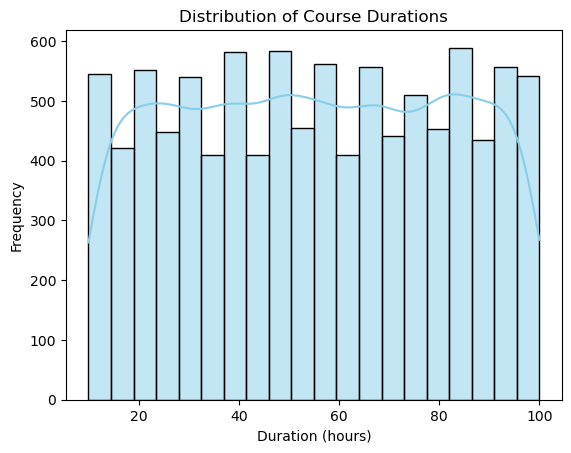

In [10]:
# 1. Distribution of Course Durations
plt.figure()
sns.histplot(data['Duration (hours)'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Course Durations")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.show()

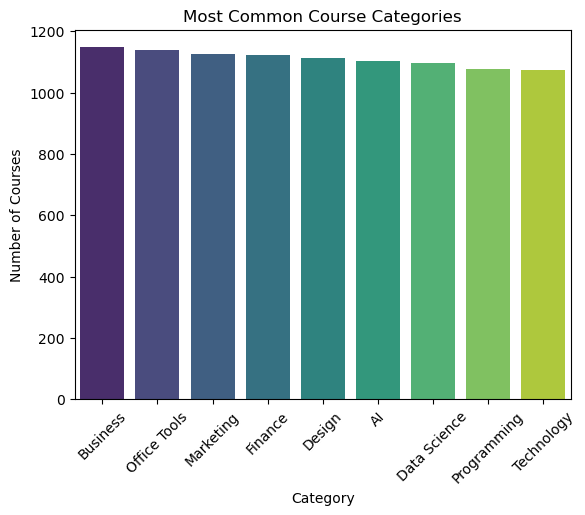

In [11]:
# 2. Most Common Course Categories
plt.figure()
category_counts = data['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Most Common Course Categories")
plt.ylabel("Number of Courses")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

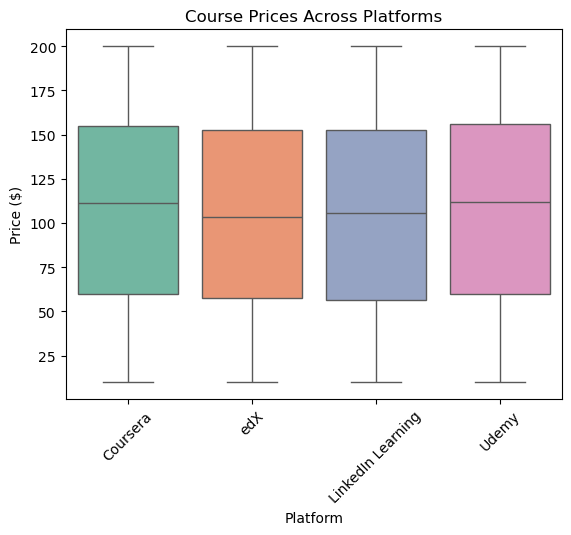

In [12]:
# 3. Course Prices Across Platforms
plt.figure()
sns.boxplot(x="Platform", y="Price ($)", data=data, palette="Set2")
plt.title("Course Prices Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

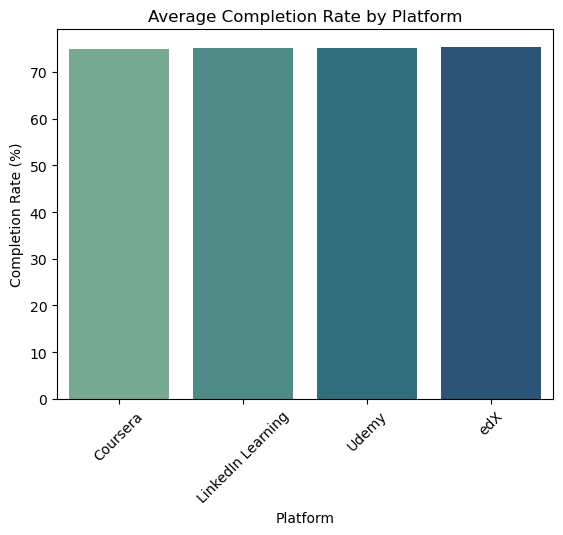

In [13]:
# 4. Average Completion Rate for Each Platform
plt.figure()
platform_completion = data.groupby('Platform')['Completion_Rate (%)'].mean().sort_values()
sns.barplot(x=platform_completion.index, y=platform_completion.values, palette="crest")
plt.title("Average Completion Rate by Platform")
plt.ylabel("Completion Rate (%)")
plt.xlabel("Platform")
plt.xticks(rotation=45)
plt.show()

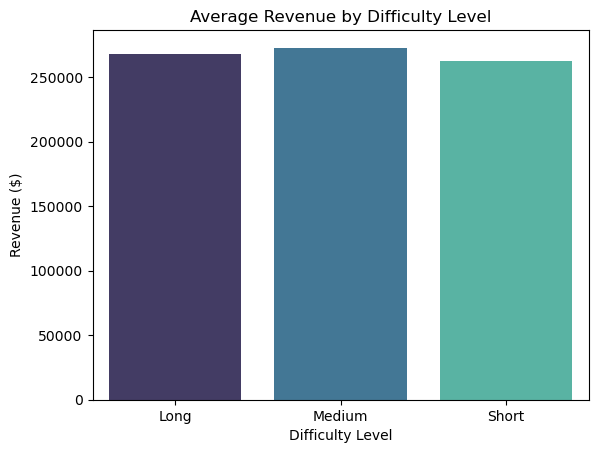

In [14]:
# 5. Revenue Distribution Across Difficulty Levels
plt.figure()
difficulty_revenue = data.groupby('Difficulty_Level')['Revenue ($)'].mean()
sns.barplot(x=difficulty_revenue.index, y=difficulty_revenue.values, palette="mako")
plt.title("Average Revenue by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Revenue ($)")
plt.show()

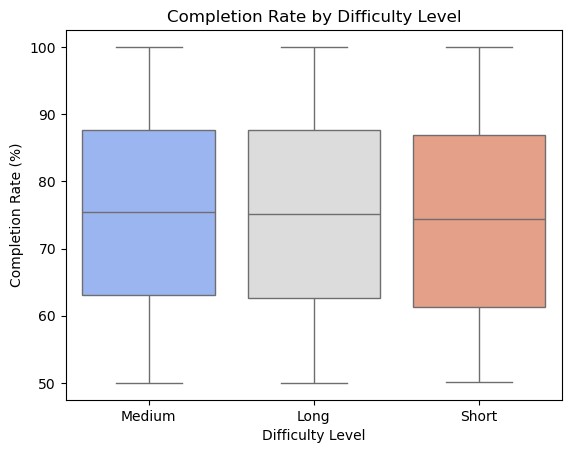

In [15]:
# 6. Completion Rate by Difficulty Level
plt.figure()
sns.boxplot(x="Difficulty_Level", y="Completion_Rate (%)", data=data, palette="coolwarm")
plt.title("Completion Rate by Difficulty Level")
plt.xlabel("Difficulty Level")
plt.ylabel("Completion Rate (%)")
plt.show()

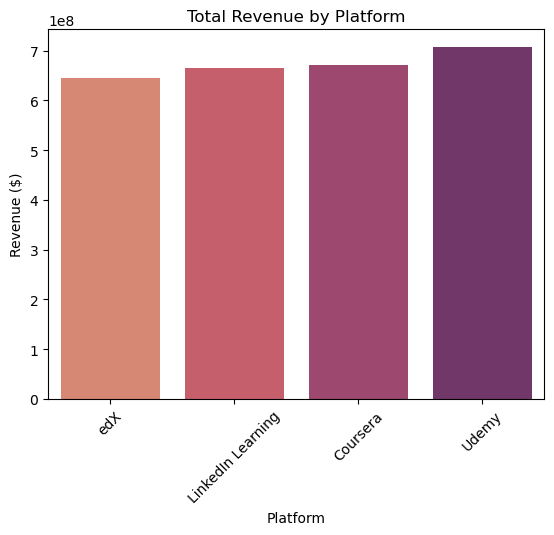

In [16]:
# 7. Platform with the Highest Revenue
plt.figure()
platform_revenue = data.groupby('Platform')['Revenue ($)'].sum().sort_values()
sns.barplot(x=platform_revenue.index, y=platform_revenue.values, palette="flare")
plt.title("Total Revenue by Platform")
plt.xlabel("Platform")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

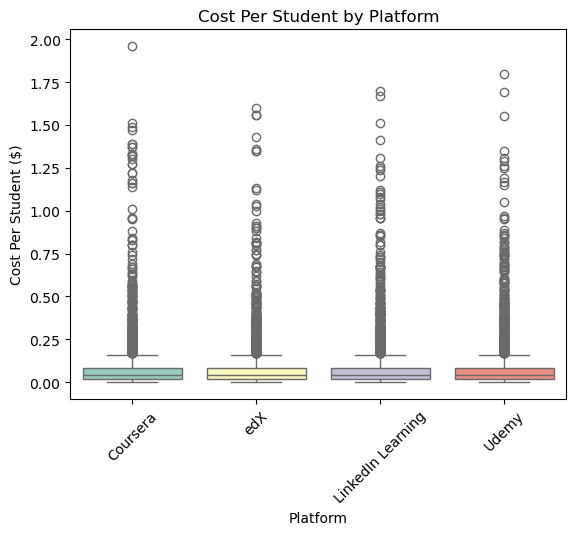

In [17]:
# 8. Cost Per Student by Platform
plt.figure()
sns.boxplot(x="Platform", y="Cost_Per_Student ($)", data=data, palette="Set3")
plt.title("Cost Per Student by Platform")
plt.xlabel("Platform")
plt.ylabel("Cost Per Student ($)")
plt.xticks(rotation=45)
plt.show()

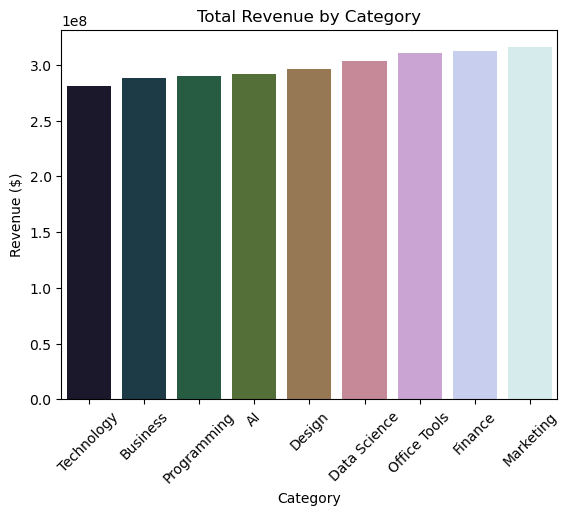

In [18]:
# 9. Total Revenue by Category
plt.figure()
category_revenue = data.groupby('Category')['Revenue ($)'].sum().sort_values()
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="cubehelix")
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

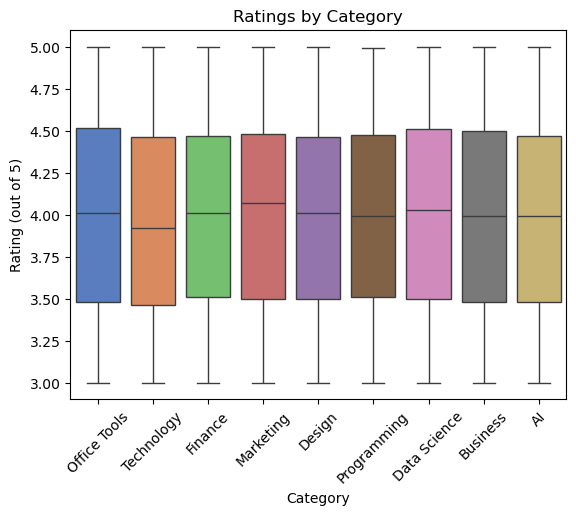

In [19]:
# 10. Ratings Across Categories
plt.figure()
sns.boxplot(x="Category", y="Rating (out of 5)", data=data, palette="muted")
plt.title("Ratings by Category")
plt.xlabel("Category")
plt.ylabel("Rating (out of 5)")
plt.xticks(rotation=45)
plt.show()

##### Conclusion
The online learning industry is competitive, with revenue and ratings being fairly consistent across platforms and course categories. Pricing structures and student costs vary, but Business, Office Tools and Marketing courses remain the most common and profitable. While longer and medium-length courses generate slightly more revenue and achieve higher completion rates, indicating that students prefer compact learning experiences. Coursera and LinkedIn Learning show slightly better engagement, possibly due to structured course formats or professional certifications. Overall, success in online education depends on a balance of pricing, engagement strategies, and course offerings rather than just completion rates.